In [1]:
import numpy as np

def not_(x):
    return -1*x

def false_(a,b):
    return 0*a*b

def true_ (a,b):
    return not_(false_(a,b))

def and_ (a,b):
    return a*b

def nand_ (a,b):
    return not_(and_(a,b))

def or_ (a,b):
    return 1-and_(a,b)

def nor_ (a,b):
    return not_(or_(a,b))

def xor_ (a,b):
    return a+b  # to do

def nxor_ (a,b):
    return not_(xor_(a,b))


In [3]:

a = np.array([0,0,1,1])
b = np.array([0,1,0,1])

print(f"\t\t: {a}")
print(f"\t\t: {b}")
print(f"\t\t: {false_(a,b)}")
print(f"\t\t: {true_(a,b)}")
print(f"\t\t: {and_(a, b)}")
print(f"\t\t: {nand_(a, b)}")
print(f"\t\t: {or_(a, b)}")
print(f"\t\t: {nor_(a, b)}")

		: [0 0 1 1]
		: [0 1 0 1]
		: [0 0 0 0]
		: [0 0 0 0]
		: [0 0 0 1]
		: [ 0  0  0 -1]
		: [1 1 1 0]
		: [-1 -1 -1  0]


C:\Users\dell\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


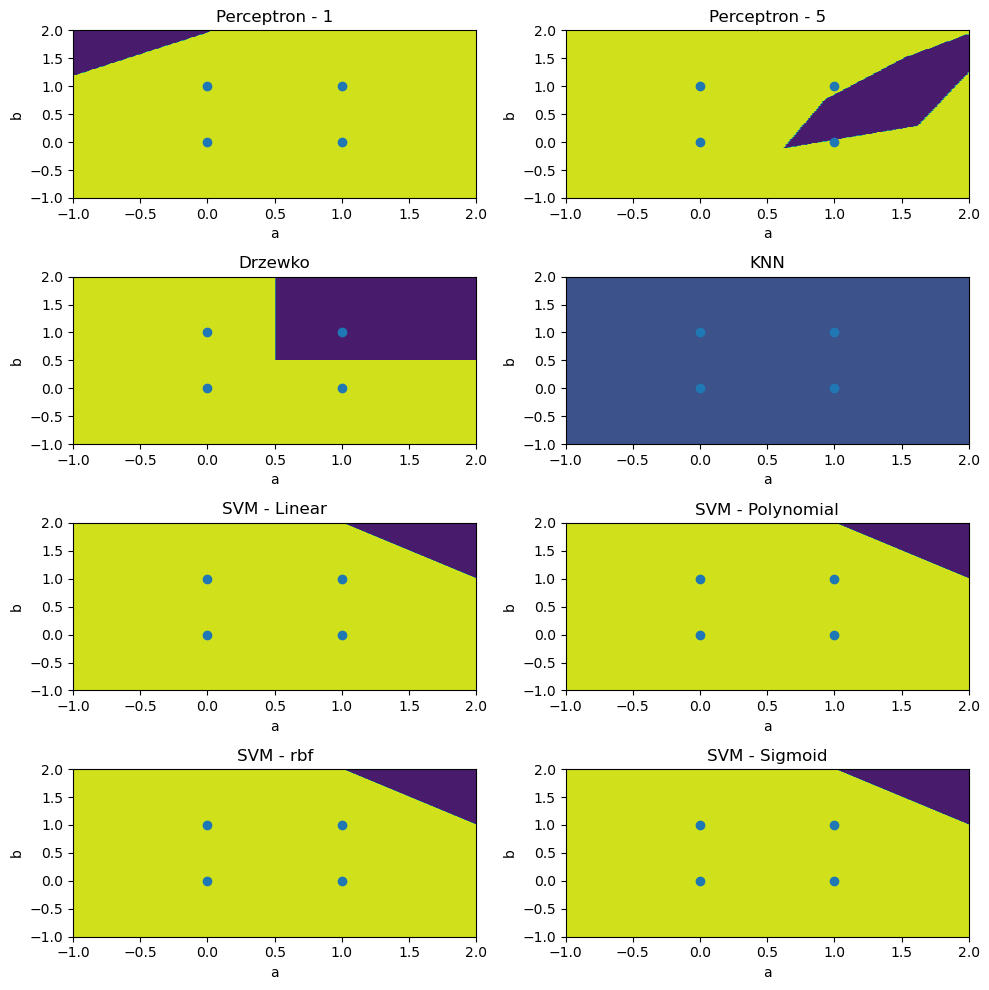

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([nand_(x[0], x[1]) for x in X])  


models = [
    ("Perceptron - 1", MLPClassifier(hidden_layer_sizes=(1,), max_iter=100, activation='relu', solver='adam')),
    ("Perceptron - 5", MLPClassifier(hidden_layer_sizes=(5,), max_iter=100, activation='relu', solver='adam')),
    ("Drzewko", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("SVM - Linear", SVC(kernel='linear')),
    ("SVM - Polynomial", SVC(kernel='linear')),
    ("SVM - rbf", SVC(kernel='linear')),
    ("SVM - Sigmoid", SVC(kernel='linear'))
]

fig, axes = plt.subplots(4, 2, figsize=(10, 10))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))


for i, (name, model) in enumerate(models):

    model.fit(X, y)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax = axes[i // 2, i % 2]
    ax.contourf(xx, yy, Z)
    ax.scatter(X[:, 0], X[:, 1])
    
    ax.set_title(name)
    ax.set_xlabel("a")
    ax.set_ylabel("b")

plt.tight_layout()
plt.show()